# Package Tutorial

This Jupyter Notebook explains each magnetic activity index calculation method and shows how to calculate them for a star using the index functions called from the __index_calc__ python module and secondary spectrum analysis functions ad plotting functions from the __spec_analysis__  & __plotting__ module. <br>
Before using the functions, make sure you have the following python packages installed on your machine;

- `numpy` 
- `pandas`
- `matplotlib`
- `tqdm`
- `astropy`

In addition to these, install the `specutils` package from [here](https://specutils.readthedocs.io/en/stable/installation.html) and the `PyAstronomy` package from [here](https://pyastronomy.readthedocs.io/en/latest/pyaCDoc/installingPyA.html)

## Table of Contents.

1. [H$\alpha$ Index](#HaI_cell)
2. [CaI Index](#CaI_cell)
3. [NaI Index](#NaI_cell)
4. [CaIIH Index](#CaIIH_cell)
5. [HeI Index](#HeI_cell)
6. [Balmer Decrement](#balmer_decrement_cell)
7. [CaII IRT Index](#CaII_IRT_cell)
8. [HARPS/HARPS-N Instrument Use](#HARPS_cell)
9. [Read data](#read_data_cell)
10. [LombScargle Periodogram](#LS_cell)
11. [Period Phase Fit](#period_fit_cell)
12. [System Ephemerides](#ephem_cell)
13. [Plotting](#plotting_cell)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from krome import * # Imports all three modules from the Python package 'krome'

## Setting a few matplotlib variables

plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.figsize'] = [10,4]

%matplotlib widget

<a id='HaI_cell'></a>

## H$\alpha$ activity index following [Boisse et al. 2009](https://arxiv.org/pdf/0811.3923)

The H$\alpha$ index is calculated simply as; $I_{H\alpha} = \frac{F_{H\alpha}}{(F_{1} + F_{2})}$ where $F_{H\alpha}$ is the mean flux within a band width of 0.16nm centered at 656.2808nm and $F_{1}, F_{2}$ are the mean fluxes within a band width of 1.075nm and 0.875nm centered at 655.087nm and 658.031nm respectively. <br>
The error on the index is estimated by differentiating the respective equation and taking into account the flux in each band giving; $\sigma_{I_{H\alpha}} \approx |I_{H\alpha}|\sqrt{(\frac{\sigma_{F_{H\alpha}}}{F_{H\alpha}})^2 + (\frac{\sigma_{F_{1}+F_{2}}}{F_{1}+F_{2}})^2}$ where $\sigma_{F_{1}+F_{2}} \approx \sqrt{\sigma_{F_{1}}^2 + \sigma_{F_{2}}^2}$ <br>

The `H_alpha_index` function is called from the __index_calc__ python module and an example run of this function is shown below.

- To get the docstring for this function along with its parameters list, type the function in a cell with a '?' next to it or type help(function/module) and run it. <br>
NOTE: This can be done for any function/module.

In [2]:
index_calc.H_alpha_index?

Signature:
index_calc.H_alpha_index(
    file_path,
    radial_velocity,
    degree=4,
    H_alpha_line=656.2808,
    H_alpha_band=0.16,
    CaI_line=657.2795,
    CaI_band=0.08,
    F1_line=655.087,
    F1_band=1.075,
    F2_line=658.031,
    F2_band=0.875,
    Instrument='NARVAL',
    norm_spec=False,
    plot_fit=False,
    plot_spec=True,
    print_stat=True,
    save_results=False,
    results_file_name=None,
    save_figs=False,
    save_figs_name=None,
    out_file_path=None,
    ccf_file_path=None,
    CaI_index=True,
)
Docstring:
Calculates the H alpha index following Boisse I., et al., 2009, A&A, 495, 959. In addition, it also 
calculates the CaI index following Robertson P., Endl M., Cochran W. D., Dodson-Robinson S. E., 2013, ApJ, 764, 3. 

This index uses the exact same reference continuums, F1 and F2, used for the H alpha index to serve as a 
control against the significance of H alpha index variations!

Parameters:
-----------

file_path: list, .s format (NARVAL), ADP...

- Below is an example run of this function on the M dwarf GJ 436 spectrum taken from [Polarbase](http://polarbase.irap.omp.eu).
- Input the .s file path to the `file_path parameter`, .out file path to the `out_file_path parameter` and the stellar radial velocity to the `radial_velocity` parameter. Note, these file paths should be given as a list.
- Now simply run the cell to calculate the H alpha index. The run begins by showing a progress bar with the total number of files being analysed, the run time per iteration and the total estimated run time. The run shows an interactive plot because of the magic command `%matplotlib widget` ran in cell 1 above (For Jupyter Notebook, type `%matplotlib notebook` instead). NOTE: If it does not work in Jupyter Lab, read this stackoverflow [issue](https://stackoverflow.com/questions/50149562/jupyterlab-interactive-plot).

Reading the data from the .s file: Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Stokes Profile: [V]
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Extracting all overlapping spectral orders
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Extracting useful object parameters from the .out file: Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out
-------------------------------------------------------------------------------------------------------------------------------------------------------------
HJD: 2457542.37484
RA: 11:43:0.90
DEC: 26:36:45.9
AIRMASS: 1.142
T_EXP: 2800

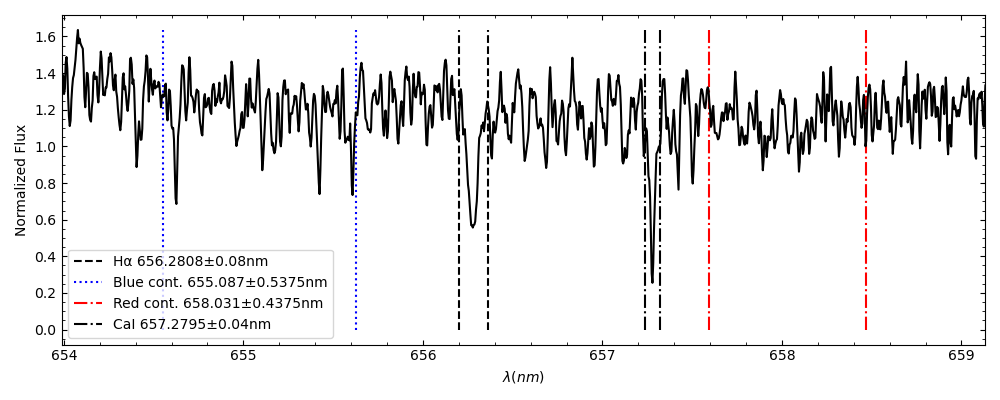

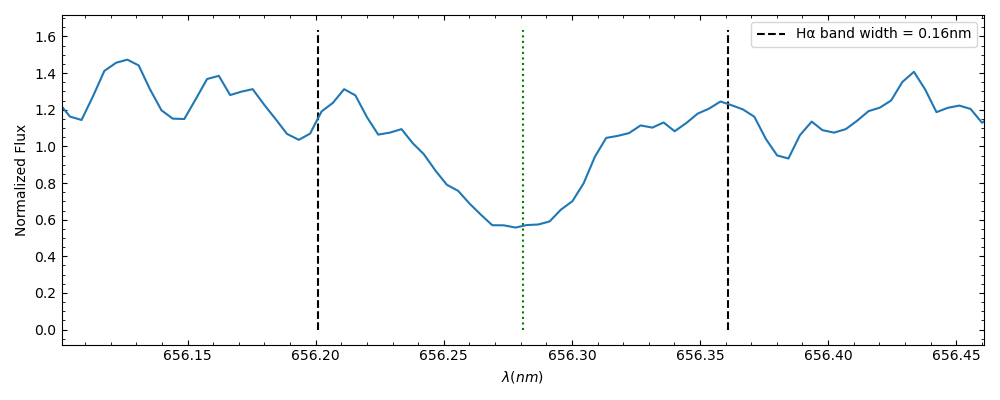

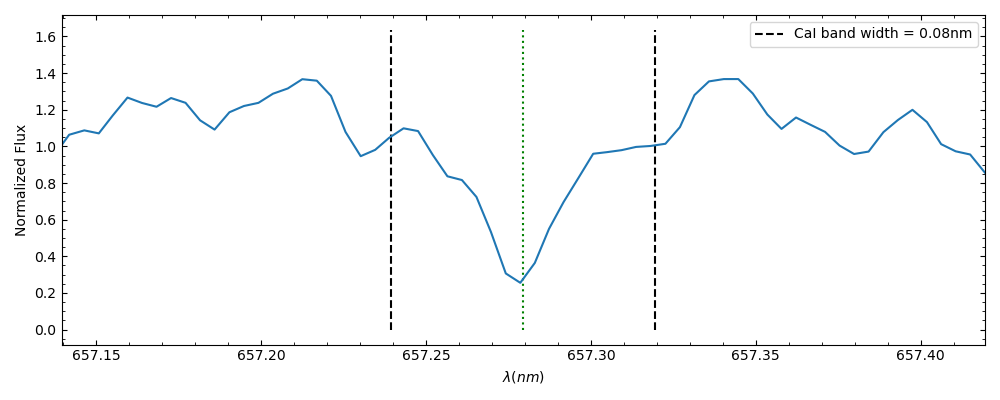

In [3]:
## NARVAL spectra of GJ 436

file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s'
out_file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out'

HaI = index_calc.H_alpha_index(file_path=[file_path],
                               out_file_path=[out_file_path],
                               radial_velocity=9609)

<a id='CaI_cell'></a>

## CaI index within H$\alpha$ index function following [Robertson et al. 2013](https://ui.adsabs.harvard.edu/abs/2013ApJ...764....3R/abstract)

The CaI index is calculated the same way as the H$\alpha$ index as; $I_{CaI} = \frac{F_{CaI}}{(F_{1} + F_{2})}$ where $F_{CaI}$ is the mean flux within a band width of 0.08 nm centered at 657.2795 nm with $F_{1}$ and $F_{2}$ being the same continuum fluxes used for the H$\alpha$ index. This index is known to not vary with stellar magnetic activity and because of this, the CaI index is calculated as a check for the H$\alpha$ activity significance since any variation in H$\alpha$ activity should not be seen in the CaI indices. <br>
The error on the index is estimated by differentiating the respective equation and taking into account the flux in each band giving; $\sigma_{I_{CaI}} \approx |I_{CaI}|\sqrt{(\frac{\sigma_{F_{CaI}}}{F_{CaI}})^2 + (\frac{\sigma_{F_{1}+F_{2}}}{F_{1}+F_{2}})^2}$ where $\sigma_{F_{1}+F_{2}} \approx \sqrt{\sigma_{F_{1}}^2 + \sigma_{F_{2}}^2}$ <br>
- The CaI index is calculated within the `H_alpha_index` above can be controlled with the `CaI_index` parameter (See its docstring for more info).

<a id='second_func_cell'></a>

### NOTE: 

- The spectrum data downloaded from Polarbase consists of a number of individual spectral orders all of which together form the entire spectrum profile. Therefore, to calculate an activity index, one needs to know which of these spectral orders contains the required chromospheric lines and its respective reference continuum lines. <br>
- Mostly the spectrum data of any star downloaded from PolarBase will have the chromospheric lines appearing within the same spectral order whose numbers are fixed for each activity index function but if that's not the case, the `read_data` and `check_lines` functions within the __spec_analysis__ module can be used to check which spectral order for a star contains the required chromopsheric lines, as shown below;

Reading the data from the .s file: Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Stokes Profile: [V]
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Extracting all overlapping spectral orders
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Extracting useful object parameters from the .out file: Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out
-------------------------------------------------------------------------------------------------------------------------------------------------------------
HJD: 2457542.37484
RA: 11:43:0.90
DEC: 26:36:45.9
AIRMASS: 1.142
T_EXP: 2800

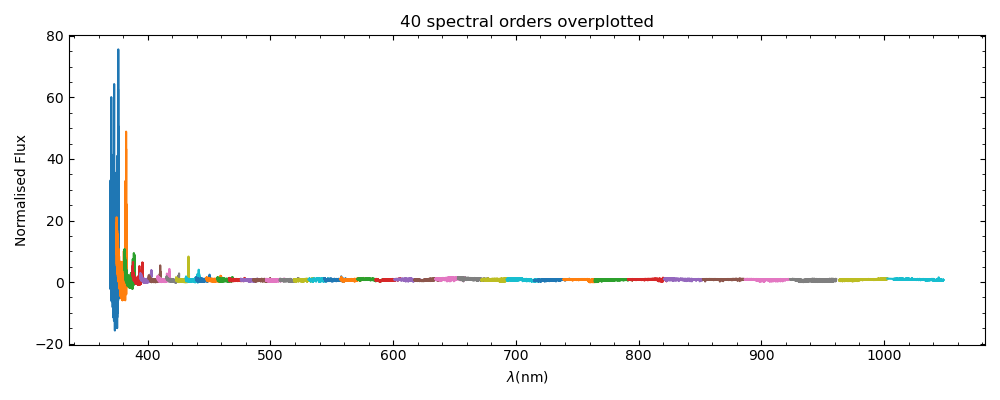

In [4]:
# The 'read_data' function extracts all spectral orders and plots them from the .s_file along with some 
# useful object parameters from the .out file

obj_params, spec_orders = spec_analysis.read_data(file_path=file_path,
                                                  out_file_path=out_file_path,
                                                  Instrument='NARVAL')

- Now to run the `check_lines` function, we need to create three lists each containing the name of the lines, their wavelengths and their respective bandwidths as shown below:

In [5]:

H_alpha_line=656.2808
H_alpha_band=0.16
CaI_line=657.2795
CaI_band=0.08
F1_line=655.087
F1_band=1.075
F2_line=658.031
F2_band=0.875

all_lines_names = ['Hα', 'CaI', 'F1', 'F2']
all_lines = [H_alpha_line, CaI_line, F1_line, F2_line]
all_bandwidths = [H_alpha_band, CaI_band, F1_band, F2_band]

line_idx = spec_analysis.check_lines(spectral_orders=spec_orders,
                                     line_names=all_lines_names,
                                     lines=all_lines,
                                     bandwidths=all_bandwidths)

The Hα line is found within 2 spectral order(s)
Order: #35
Order: #34
-------------------------------------------------------------------------------------------------------------------------------------------------------------
The CaI line is found within 2 spectral order(s)
Order: #35
Order: #34
-------------------------------------------------------------------------------------------------------------------------------------------------------------
The F1 line is found within 2 spectral order(s)
Order: #35
Order: #34
-------------------------------------------------------------------------------------------------------------------------------------------------------------
The F2 line is found within 2 spectral order(s)
Order: #35
Order: #34
-------------------------------------------------------------------------------------------------------------------------------------------------------------


- The `check_lines` function checks which spectral order contains the given lines, prints out the results and returns the index of each spectral order for each line. Here, orders #35 and #34 both contain the required lines for H$\alpha$ index calculation but we only use #34 due to its higher SNR.
- To calculate the index on normalized spectrum, set the `norm_spec` parameter to True as shown below. The spectral order is normalized by fitting a high order polynomial to the continuum and dividing the spectra by the resulting fit. The polynomial degree can be assigned using the `degree` parameter which is set to `4` by default. The `plot_fit` parameter is also set to True to show the fitting procedure. 

Reading the data from the .s file: Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Stokes Profile: [V]
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Extracting all overlapping spectral orders
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Extracting useful object parameters from the .out file: Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out
-------------------------------------------------------------------------------------------------------------------------------------------------------------
HJD: 2457542.37484
RA: 11:43:0.90
DEC: 26:36:45.9
AIRMASS: 1.142
T_EXP: 2800

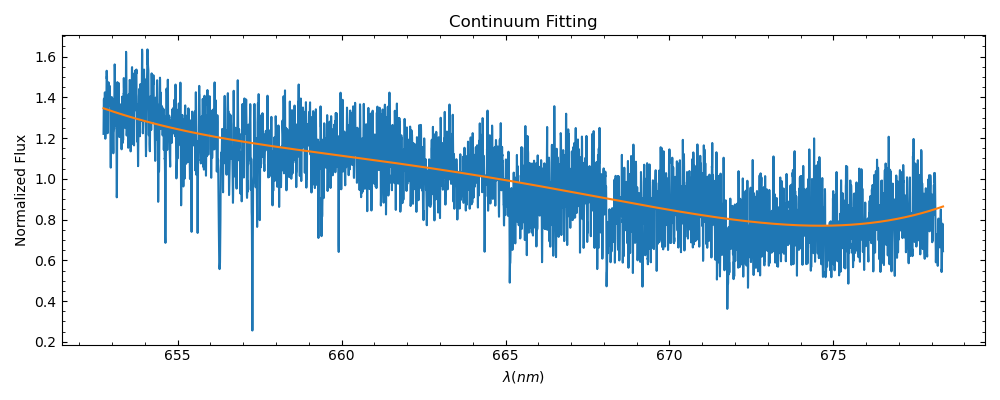

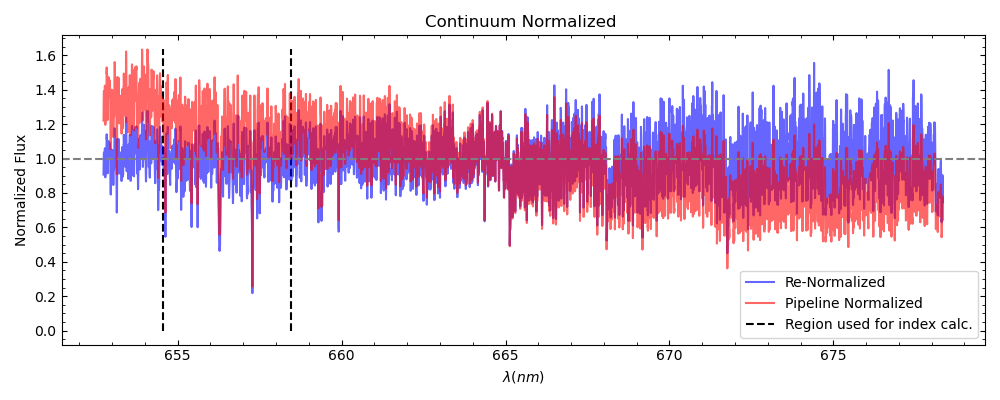

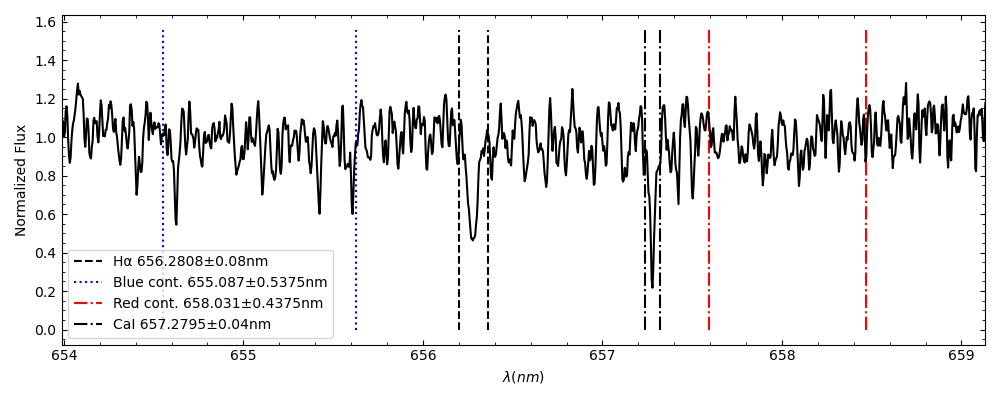

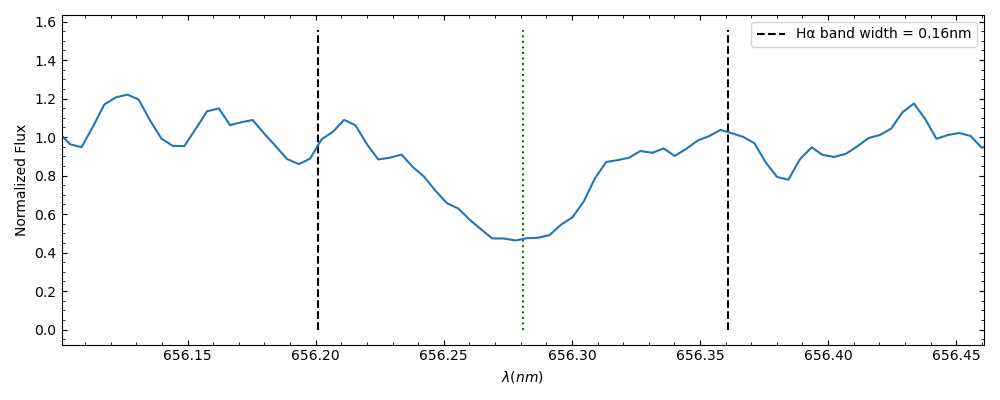

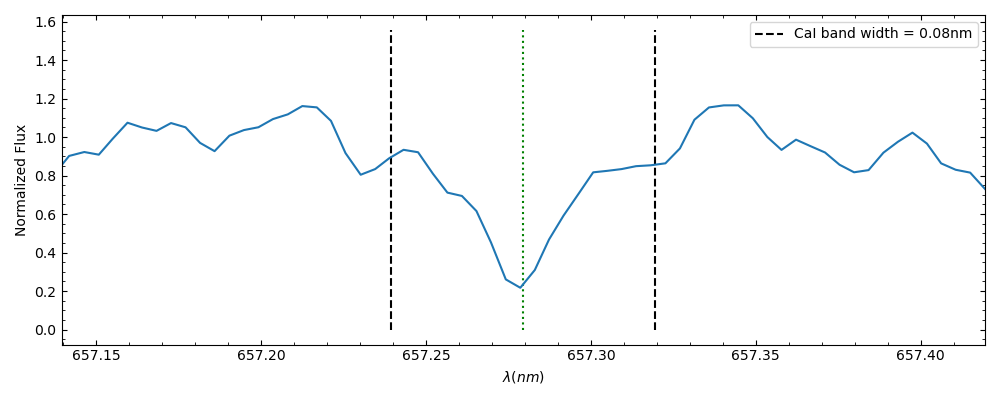

In [6]:

HaI_norm = index_calc.H_alpha_index(file_path=[file_path],
                                    out_file_path=[out_file_path],
                                    radial_velocity=9609,
                                    norm_spec=True,
                                    plot_fit=True)


- To run this function on multiple files, input a list containing the file paths of each spectrum as shown below. Note the params `plot_spec` and `print_stat` are set to False to not show multiple plots and status updates.

In [7]:
## 5 different NARVAL spectra 

s_files = ['Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s',
 'Test_files/NARVAL/02may16_norm_gj436_v_01/02may16_norm_gj436_v_01.s',
 'Test_files/NARVAL/03may16_norm_gj436_v_01/03may16_norm_gj436_v_01.s',
 'Test_files/NARVAL/04jun16_norm_gj436_v_01/04jun16_norm_gj436_v_01.s',
 'Test_files/NARVAL/04may16_norm_gj436_v_01/04may16_norm_gj436_v_01.s']

out_files = ['Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out',
 'Test_files/NARVAL/02may16_norm_gj436_v_01/02may16_norm_gj436_v_01.out',
 'Test_files/NARVAL/03may16_norm_gj436_v_01/03may16_norm_gj436_v_01.out',
 'Test_files/NARVAL/04jun16_norm_gj436_v_01/04jun16_norm_gj436_v_01.out',
 'Test_files/NARVAL/04may16_norm_gj436_v_01/04may16_norm_gj436_v_01.out']


HaI_multi = index_calc.H_alpha_index(file_path=s_files,
                                     out_file_path=out_files,
                                     radial_velocity=9609,
                                     plot_spec=False,
                                     print_stat=False)

- The run results and its plots can be saved by setting the `save_results` and `save_figs` parameters to True.
- The results will be saved in a .csv file format with the given `results_file_name` and the figures will be saved in a pdf format starting with the Julian Date of the spectrum. 
- Both of these will be saved in the current working directory.

<a id='NaI_cell'></a>

## NaI doublet Index following [Rodrigo F. Díaz et al. 2007](https://arxiv.org/pdf/0704.0812.pdf)
The index is defined as $I_{NaI} = \frac{f_{1} + f_{2}}{f_{cont}}$ where $f_{1}$ & $f_{2}$ are the mean fluxes within a 0.1nm bandwidth centered on the D1 589.592nm and D2 588.995nm line cores. $f_{cont}$ is defined as the pseudo-continuum calculated as $f_{cont} = \frac{F_{1} + F_{2}}{2}$ where $F_{1}$ & $F_{2}$ are mean fluxes of the 10 highest flux values within two reference bands of width 1nm and 2nm centered on 580.5nm and 609.0nm respectively. <br>  
The error on the index is estimated by differentiating the respective equation above and taking into account the flux in each band giving; $\sigma_{I_{NaI}} \approx |I_{NaI}|\sqrt{(\frac{\sigma_{f_{1}+f_{2}}}{f_{1}+f_{2}})^2 + (\frac{\sigma_{f_{cont}}}{f_{cont}})^2}$ where $\sigma_{f_{1}+f_{2}} \approx \sqrt{\sigma_{f_{1}}^2 + \sigma_{f_{2}}^2}$

In [8]:
index_calc.NaI_index?

Signature:
index_calc.NaI_index(
    file_path,
    radial_velocity,
    degree=4,
    NaID2=588.995,
    NaID1=589.592,
    NaI_band=0.1,
    F1_line=580.5,
    F1_band=1.0,
    F2_line=609.0,
    F2_band=2.0,
    hfv=10,
    Instrument='NARVAL',
    norm_spec=False,
    plot_fit=False,
    plot_spec=True,
    print_stat=True,
    save_results=False,
    results_file_name=None,
    save_figs=False,
    save_figs_name=None,
    out_file_path=None,
    ccf_file_path=None,
)
Docstring:
This function calculates the NaI doublet index following the method proposed in Rodrigo F. Díaz et al. 2007.

Parameters:
-----------

file_path: list, .s format (NARVAL), ADP..._.fits format (HARPS) or s1d_A.fits format (HARPS-N)
List containing paths of the spectrum files

radial_velocity: int
Stellar radial velocity along the line-of-sight. This value is used for doppler shifting the spectra to its rest frame.

degree: int, default: 4
The degree of the Chebyshev1D polynomial to fit to the continuum for 

- This index function is run in the same manner as the H$\alpha$ index function shown above! One thing to note here is that there are 3 individual spectral orders that cover the regions used for this index calculation which are orders #39, #38, and #37. The NaID lines are covered in both orders #39 and #38 but only order #38 is used for their flux calculations due to its higher SNR. The blue and red continuum regions are covered in order #39 and #37 respectively.
- The number of highest flux values used for the flux calculation of the blue and red continuum regions can be changed using the `hfv` parameter which is set to `10` by default. If you'd like to use ALL flux points within the refernce bandwidths for the flux calculatino, the `hfv` parameter should be set to `None`.
- Note: The function also allows you to normalize each spectral order individually using the `norm_spec` parameter by fitting a given order polynomial to the entire order. But it should not be used for M star spectra since for such stars, the NaID lines are observed within the broader TiO absorption lines. See [Rodrigo F. Díaz et al. 2007](https://arxiv.org/pdf/0704.0812.pdf) for more info!

In [ ]:
## NARVAL spectra of GJ 436

file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s'
out_file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out'

NaI = index_calc.NaI_index(file_path=[file_path],
                           out_file_path=[out_file_path],
                           radial_velocity=9609)

Reading the data from the .s file: Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Stokes Profile: [V]
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Extracting all overlapping spectral orders
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Extracting useful object parameters from the .out file: Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out
-------------------------------------------------------------------------------------------------------------------------------------------------------------
HJD: 2457542.37484
RA: 11:43:0.90
DEC: 26:36:45.9
AIRMASS: 1.142
T_EXP: 2800

<a id='CaIIH_cell'></a>

## CaIIH Index following [Morgenthaler et al. 2012](https://ui.adsabs.harvard.edu/abs/2012A%26A...540A.138M/abstract)
The index is defined as $I_{CaIIH} = \frac{F_{CaIIH}}{F_{cont}}$ where $F_{CaIIH}$ is the mean flux within a 0.04nm wide rectangular bandpass centred on the CaIIH line 396.847nm and $F_{cont}$ is the mean flx with a 2nm wide rectangular window centered on 400.107nm. <br>
The error on the index is estimated by differentiating the respective equation and taking into account the flux in each band giving;
$\sigma_{I_{CaIIH}} \approx |I_{CaIIH}|\sqrt{(\frac{\sigma_{F_{CaIIH}}}{F_{CaIIH}})^2 + (\frac{\sigma_{F_{cont}}}{F_{cont}})^2}$


In [ ]:
index_calc.CaIIH_Index?

In [ ]:
## NARVAL spectra of GJ 436

file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s'
out_file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out'

CaIIH = index_calc.CaIIH_Index(file_path=[file_path],
                               out_file_path=[out_file_path],
                               radial_velocity=9609)


<a id='HeI_cell'></a>

## HeI index following [Gomes da Silva et al. 2011](https://ui.adsabs.harvard.edu/abs/2011A%26A...534A..30G/abstract)

The HeI index is calculated simply as; $I_{HeI} = \frac{F_{HeI}}{(F_{1} + F_{2})}$ where $F_{HeI}$ is the mean flux within a band width of 0.04nm centered at 587.562nm and $F_{1}, F_{2}$ are the mean fluxes within a band width of 0.5nm centered at 586.9nm and 588.1nm respectively. <br>
The error on the index is estimated by differentiating the respective equation and taking into account the flux in each band giving; $\sigma_{I_{HeI}} \approx |I_{HeI}|\sqrt{(\frac{\sigma_{F_{HeI}}}{F_{HeI}})^2 + (\frac{\sigma_{F_{1}+F_{2}}}{F_{1}+F_{2}})^2}$ where $\sigma_{F_{1}+F_{2}} \approx \sqrt{\sigma_{F_{1}}^2 + \sigma_{F_{2}}^2}$ <br>

In [ ]:
index_calc.HeI_index?

In [ ]:
## NARVAL spectra of GJ 436

file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s'
out_file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out'

HeI = index_calc.HeI_index(file_path=[file_path],
                           out_file_path=[out_file_path],
                           radial_velocity=9609)

<a id='balmer_decrement_cell'></a>

## Balmer Decrement following [Frasca, A. et al. 2015](https://ui.adsabs.harvard.edu/abs/2015A%26A...575A...4F/abstract)

- NOTE: For first papers about the Balmer Decrement, see [Landamn & Mongillo 1979](https://ui.adsabs.harvard.edu/abs/1979ApJ...230..581L/abstract) 
or [Chester 1991](https://ui.adsabs.harvard.edu/abs/1991PhDT.........9C/abstract) <br>

The balmer decrement is the ratio of the flux in the H$\alpha$ line to the flux in the H$\beta$ line, i.e., $ BD = \frac{F_{H\alpha}}{F_{H\beta}}$ where $F_{H\alpha}$ is the mean flux within a 0.1nm bandwidth centered at 656.2808nm & $F_{H\beta}$ is mean flux within the same bandwidth centered at 486.135nm. <br>
The error on the decrement is estimated by differentiating the respective equation giving; $\sigma_{BD} \approx |BD|\sqrt{(\frac{\sigma_{F_{H\alpha}}}{F_{H\alpha}})^2 + (\frac{\sigma_{F_{H\beta}}}{F_{H\beta}})^2}$ 

In [ ]:
index_calc.balmer_decrement?

In [ ]:
## NARVAL spectra of GJ 436

file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s'
out_file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out'

BD = index_calc.balmer_decrement(file_path=[file_path],
                                 out_file_path=[out_file_path],
                                 radial_velocity=9609)

<a id='CaII_IRT_cell'></a>

## CaII Infrared Triplet (IRT) index following [M. MIttag et al. 2017](https://ui.adsabs.harvard.edu/abs/2017A%26A...607A..87M/abstract)

The CaII IRT index is calculated as; <br>

$I_{IRT_x} = \frac{F_{IRT_x}}{F_{1} + F_{2}}$ <br>

where $F_{IRT_x}$ is the mean flux of the line & $F_{1}$ \& $F_{2}$ are the mean fluxes in the reference continuum bands. Here, $x$ = 1, 2, and 3, corresponds to each of the triplet lines at 849.8nm, 854.2nm & 866.2nm respectively . The $F_{IRT_x}$ mean fluxes are calculated within a 0.1nm wide bandwidth and the continuum mean fluxes within a 0.2nm wide bandwidth.

In [ ]:
## NARVAL spectra of GJ 436

file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s'
out_file_path = 'Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out'

CaII_IRT = index_calc.CaII_IRT(file_path=[file_path],
                               out_file_path=[out_file_path],
                               radial_velocity=9609)

<a id='HARPS_cell'></a>

## HARPS and HARPS-N Intrument spectra
- All index functions, except for CaII IRT, can be used on spectra obtained from the HARPS and HARPS-N spectrographs using the `Instrument` parameter as shown below!

In [ ]:
## HARPS spectra of GJ 436

file_path = 'Test_files/HARPS/ADP.2020-03-23T01:02:03.392.fits'

HaI_HARPS = index_calc.H_alpha_index(file_path=[file_path],
                                     radial_velocity=9609,
                                     Instrument='HARPS')

In [ ]:
## HARPS-N spectra of GJ 436

s1d_file_path = 'Test_files/HARPS-N/HARPN.2015-02-25T21-22-33.283_s1d_A.fits'
ccf_file_path = 'Test_files/HARPS-N/HARPN.2015-02-25T21-22-33.283_ccf_M2_A.fits'

HaI_HARPS_N = index_calc.H_alpha_index(file_path=[s1d_file_path],
                                       ccf_file_path=[ccf_file_path],
                                       radial_velocity=9609,
                                       Instrument='HARPS-N')

## NOTE: 
- Notice for this run above, in addition to the file path, I also provided the CCF file path which contains the radial velocity for that particular spectra. If present, the corresponding CCF file path can be passed as a parameter to the function, for both HARPS and HARPS-N instruments, to use the radial velocity from for a better doppler shift precision. If not given, the radial velocity can be passed manually using the `radial_velocity` parameter, which in this case is already set to GJ 436's radial velocity as default.
- Note the `Instrument` parameter was not set for previous runs since it's already set to 'NARVAL' by default.

# Secondary functions from the __spec_analysis__ module

<a id='read_data_cell'></a>
## Read Data

- The `read_data` and `check_lines` functions from this python module have already been explained breifly [here](#second_func_cell). But essentially, the `read_data` function reades the spectrum data for a given instrument type. Below is an example on HARPS data.
- The function plots the read spectrum and returns the extracted object parameters as a `dict` and the spectrum as a `list` conatining the wavelength, flux and flux error.

In [ ]:
HARPS_data = spec_analysis.read_data(file_path='Test_files/HARPS/ADP.2020-03-23T01:02:03.392.fits',
                                     Instrument='HARPS')

<a id='LS_cell'></a>

## LombScargle Periodogram

In order to investigate periodicity in the variations of activity indices calculated, the `LS_periodogram` function from the __spec_analysis__ module can be used. The function calculates a LombScargle periodogram using the astropy.timeseires module (more info on it [here](https://docs.astropy.org/en/stable/timeseries/lombscargle.html)) <br>
Below is an example run of this function on the 16 H$\alpha$ indices calculated on NARVAL data of GJ 436 in the file 'Test_results.csv'

In [ ]:
## Read the Test_results file using pandas

data = pd.read_csv('Test_files/Test_HaI_results.csv')

LS = spec_analysis.LS_periodogram(x=data['HJD'].values,
                                  y=data['I_Ha'].values,
                                  dy=data['I_Ha_err'].tolist(),
                                  minimum_frequency=1/100,
                                  maximum_frequency=1.0)

- The function plots two figures. The top one shows the LombScargle periodogram with the x-axis showing trial periods in the log-scale and marking the false alarm levels (FALs) and the best period using colored lines. The bottom one shows the periodogram of the sampling window function of the given data. In this case, the sampling window period is 1.005d which is common for ground-based observations as most observations are done around the same time each night.
- The `LS_periodogram` function can take multiple arguments to control features from how many Fourier terms to include in the periodogram analysis to what method to use for calculating the false alarm probability (FAP). See function docstring for more info. 

<a id='period_fit_cell'></a>

## Period Phase Fit

- The best period detected from the periodogram above can be used to fit a sine model to the data using the `period_fit` function. Below is an example run of this function on the same data above with the model period specified as __1.206d__ and the fit parameter set to __'phase'__ which phase-folds the data at the given period and plots the best-fit model on top of it.
- The fit parameter can also be set to __'JD'__ which overplots the model sine-wave over the enitre observation timespan instead. See docstring for more info.

In [ ]:
## Read the Test_results file using pandas

data = pd.read_csv('Test_files/Test_HaI_results.csv')

p_fit = spec_analysis.period_fit(x=data['HJD'].values,
                                 y=data['I_Ha'].values,
                                 dy=data['I_Ha_err'].tolist(),
                                 period=1.206,
                                 fit='phase')

<a id='ephem_cell'></a>

## System Ephemerides

- For an exoplanet system that has an exoplanet orbiting a host star with an orbital period $P_{orb}$, it could be useful to know the orbital phase of the exoplanet at the time of its observations in order to explore possible modulation on variations of activity indices. This can be done using the `ephemerides` function. 
- The function takes the .out/.fits file path, in a list, to extract the observation HJD/BJD and calculates the planetary orbital phases using $P_{orb}$, epoch of periastron $T_{e}$ and orbital eccentricity $e$, as shown below. Note, these values for GJ 436b are set by default.
- The function can also calculate the stellar rotational phase using the `Rot_phase` parameter. See function docstring for more info.
### NOTE:
Mention link to the paper, once published, for more info on how these phases are calculated menitoned in the Appendix!

In [ ]:
ephem = spec_analysis.ephemerides(file_path=['Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.out'])

<a id='plotting_cell'></a>

# Plotting functions from the __plotting__ module

## Plot index results using `pandas`

- The calculated activity indices can plotted against their JD's simply using `pandas`
- Below is an example run on the Test_HaI_results.csv data. See documentation on plotting with `pandas` [here](https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html)

In [ ]:
## Reading the data 

data = pd.read_csv('Test_files/Test_HaI_results.csv')

## Plot data

data.plot(x='HJD', y='I_Ha', yerr='I_Ha_err', capsize=3, fmt='ok', legend=False, ylabel=r'H$\alpha$ Index')

## Pearson R Correlation plot between two indices

- After calculating the activity indices for a star, you can compare them with one another to explore possible correlations between them using the `corr_plot` function.
- The function takes the two indices and their errors as parameters and plots their correlation plot along with the Pearson R correlation coefficient calculated using `scipy.stats.pearsonr`. Below is an example run on two test result files containing the H$\alpha$ and NaI indices for GJ 436. 
## Note: 
- The function only takes the indices errors for plotting and does not use them when calculating the correlation coefficient. (See more info on how it's calculated [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html))

In [ ]:
## Reading the two index test results files

HaI_results = pd.read_csv('Test_files/Test_HaI_results.csv')
NaI_results = pd.read_csv('Test_files/Test_NaI_results.csv')

corr = plotting.corr_plot(x=HaI_results['I_Ha'],
                          xerr=HaI_results['I_Ha_err'].tolist(),
                          y=NaI_results['I_NaI'],
                          yerr=NaI_results['I_NaI_err'].tolist(),
                          xlabel=r'H$\alpha$ Index',
                          ylabel='NaI Index')

## Activity indices against system ephemerides

- After calculating the system ephemerides, an index can be plotted against the orbital and rotational phases using the `ephem_plot` function.
- The function takes the ephemerides file and the index file paths along with the name of the column containing the index values and plots the results.

In [ ]:
plotting.ephem_plot(ephem_file='Test_files/Test_ephem_results.csv',
                    index_file='Test_files/Test_HaI_results.csv',
                    index_col_name='I_Ha')

## Overplotting multiple spectrums

- To compare spectrums of different observations with one another, its often useful to overplot them. The `overplot` function from the `plotting` module does just that. <br>
- Below is an example run on 5 NARVAL files. The function takes two parameters; list of file paths and the Instrument type used. The plot can also be saved using the `save_fig` parameter.

In [ ]:
s_files = ['Test_files/NARVAL/02jun16_norm_gj436_v_01/02jun16_norm_gj436_v_01.s',
 'Test_files/NARVAL/02may16_norm_gj436_v_01/02may16_norm_gj436_v_01.s',
 'Test_files/NARVAL/03may16_norm_gj436_v_01/03may16_norm_gj436_v_01.s',
 'Test_files/NARVAL/04jun16_norm_gj436_v_01/04jun16_norm_gj436_v_01.s',
 'Test_files/NARVAL/04may16_norm_gj436_v_01/04may16_norm_gj436_v_01.s']

In [ ]:
plotting.overplot(s_files, Instrument='NARVAL')

- Note: This function also works for HARPS and HARPS-N instruments!